# CS433 Web Scraping Report 
## Group 1:
### Gavin Stone, Isaac Adams, Kaden Hicklin, Owen Miller, Samuel Shevlin, Sullivan Gleason

BeautifulSoup

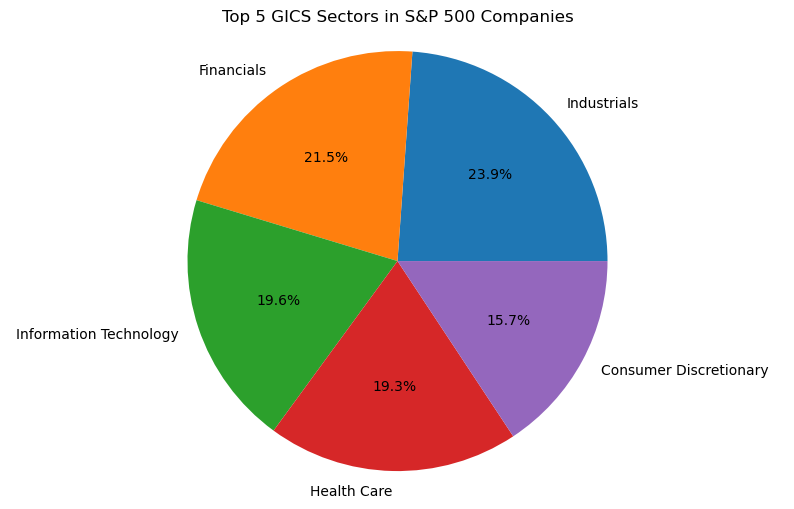

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters,Date added,CIIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [52]:
import requests 
from bs4 import BeautifulSoup as bs 
import pandas as pd 
import matplotlib.pyplot as plt

# get the html data from the url 
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"
response = requests.get(url)
html_content = response.content

# create a BeautifulSoup object for parsing 
soup = bs(html_content, 'html.parser')

# used to find the class of any tables; outputs is 'wikitable sortable' twice, representing both tables
# print('Classes of each table:')
# for table in soup.find_all('table'):
#     print(table.get('class'))

# finds the first table with the wikitable sortable class 
table = soup.find('table', {'class': 'wikitable sortable'})

# extract data from the table, skips header row 
data = [] 
rows = table.find_all('tr')
for row in rows[1:]: 
    columns = row.find_all('td')
    columns = [column.text.strip() for column in columns]
    data.append(columns)
    
# convert data to dataframe for plotting
columns = ["Symbol", "Security", "GICS Sector", "GICS Sub-Industry", "Headquarters", "Date added", "CIIK", "Founded"]
df = pd.DataFrame(data, columns=columns)

df.to_csv('BeautifulSoupWebScraping.csv', index=False)  


# plotting: 
# count the occurrences of each GICS Sector
sector_counts = df['GICS Sector'].value_counts()

# sort the sector counts in descending order
sorted_sector_counts = sector_counts.sort_values(ascending=False)

# get the top 5 GICS Sectors
top_sectors = sorted_sector_counts.head(5)

# calculate the total number of companies
total_companies = df.shape[0]

# calculate the percentage of each top sector
top_sector_percentages = (top_sectors / total_companies) * 100

# count the occurrences of each GICS Sector
sector_counts = df['GICS Sector'].value_counts()

# calculate the total number of companies
total_companies = df.shape[0]

# calculate the percentage of each GICS Sector
sector_percentages = (sector_counts / total_companies) * 100

# add the percentage as a new column to the dataframe
df['Percentage'] = df['GICS Sector'].map(sector_percentages)

# sort the dataframe by the 'Percentage' column in descending order
df = df.sort_values(by='Percentage', ascending=False)

top_sectors = df['GICS Sector'].value_counts().head(5)
top_sector_percentages = (top_sectors / df.shape[0]) * 100

# create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_sector_percentages, labels=top_sector_percentages.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Top 5 GICS Sectors in S&P 500 Companies')
plt.show()
pd.read_csv('BeautifulSoupWebScraping.csv').head()

MechanicalSoup

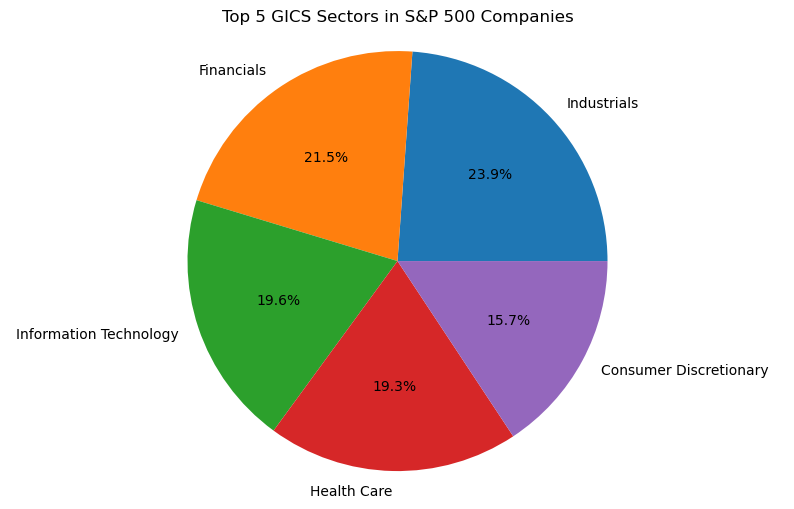

    Symbol            Security             GICS Sector  \
0      MMM                  3M             Industrials   
1      AOS         A. O. Smith             Industrials   
2      ABT              Abbott             Health Care   
3     ABBV              AbbVie             Health Care   
4      ACN           Accenture  Information Technology   
..     ...                 ...                     ...   
498    XYL          Xylem Inc.             Industrials   
499    YUM         Yum! Brands  Consumer Discretionary   
500   ZBRA  Zebra Technologies  Information Technology   
501    ZBH       Zimmer Biomet             Health Care   
502    ZTS              Zoetis             Health Care   

                                GICS Sub-Industry             Headquarters  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North Chicago, Ill

In [53]:
import mechanicalsoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"

# initialize MechanicalSoup browser
browser = mechanicalsoup.Browser()
response = browser.get(url)

# extract data from table
table = response.soup.find('table', {'class': 'wikitable sortable'})

data = []
rows = table.find_all('tr')
for row in rows[1:]:
    columns = row.find_all('td')
    columns = [column.text.strip() for column in columns]
    data.append(columns)

# Convert data to df
columns = ["Symbol", "Security", "GICS Sector", "GICS Sub-Industry", "Headquarters", "Date added", "CIK", "Founded"]
df = pd.DataFrame(data, columns=columns)

# save to CSV
df.to_csv('MechanicalSoupWebScraping.csv', index=False)

# plot
sector_counts = df['GICS Sector'].value_counts()
sorted_sector_counts = sector_counts.sort_values(ascending=False)
top_sectors = sorted_sector_counts.head(5)
total_companies = df.shape[0]
top_sector_percentages = (top_sectors / total_companies) * 100

plt.figure(figsize=(10, 6))
plt.pie(top_sector_percentages, labels=top_sector_percentages.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 GICS Sectors in S&P 500 Companies')
plt.show()

print(df)